# ***Chapter 5: Holidays***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

## *Adding default country holidays*

In [2]:

df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)

In [3]:
model.add_country_holidays(country_name='US')

08:50:46 - cmdstanpy - INFO - Chain [1] start processing
08:50:46 - cmdstanpy - INFO - Chain [1] done processing


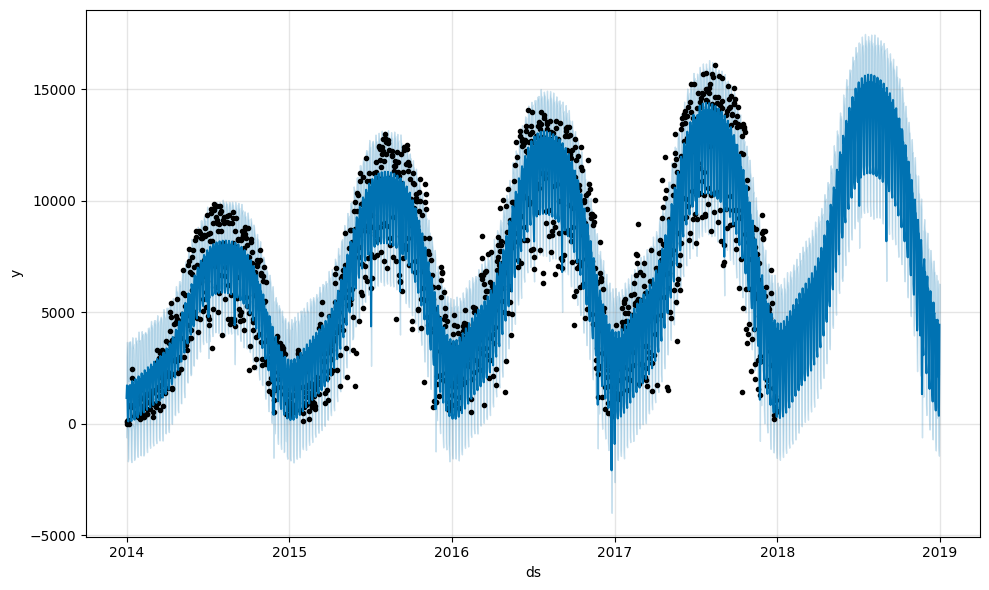

In [4]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

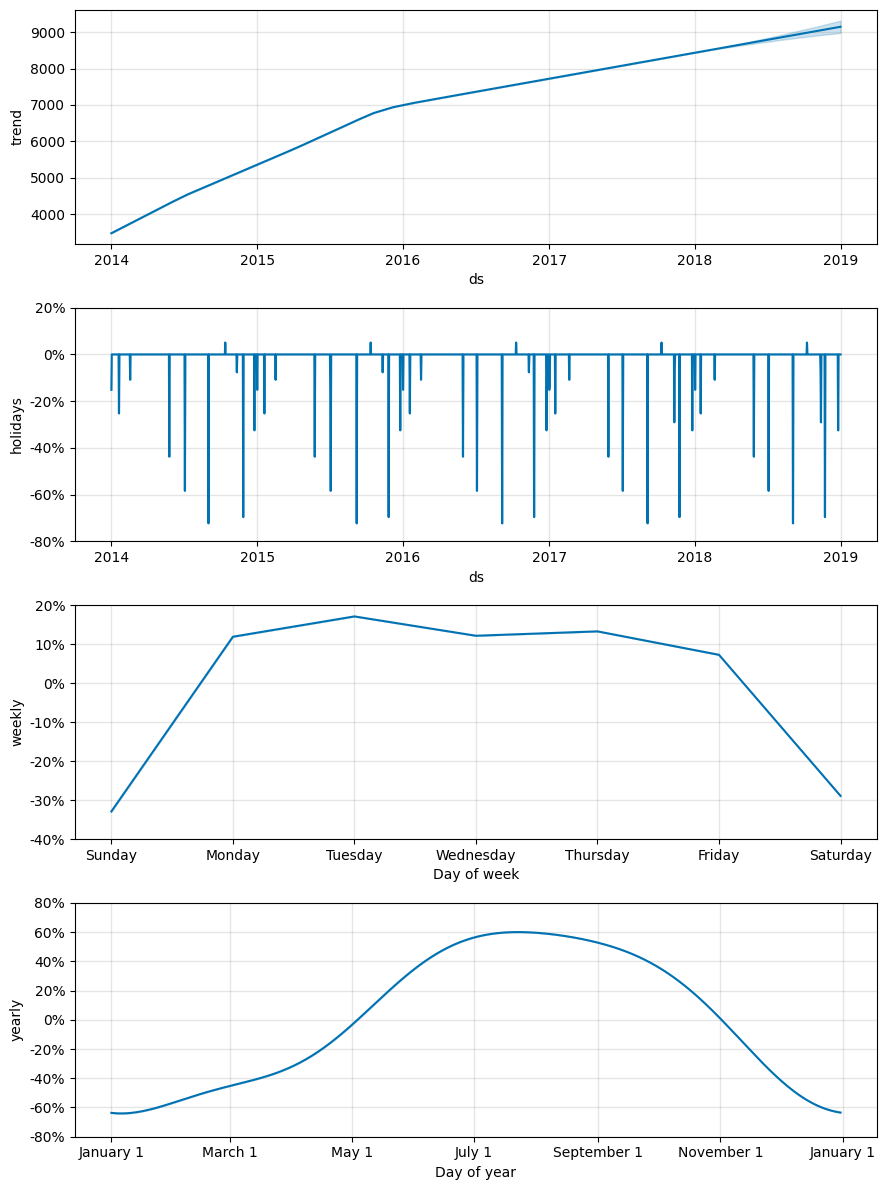

In [5]:
fig2 = model.plot_components(forecast)
plt.show()

# Check 'holidays' componet

In [6]:
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [12]:
forecast[['holidays']]

,holidays
0,-0.151432
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1818,0.000000
1819,0.000000
1820,0.000000
1821,0.000000


<Axes: >

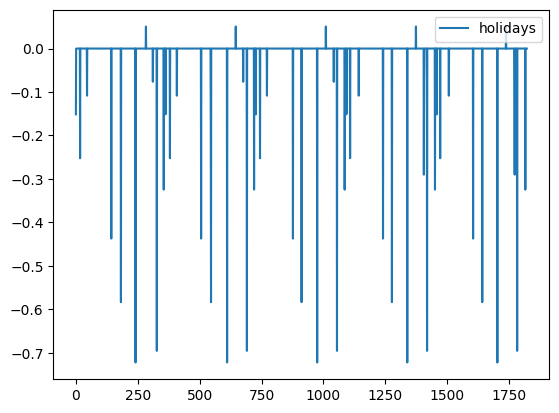

In [14]:
forecast[['holidays']].plot()

In [18]:
## Note
## There are each holiday columns newly created

"New Year's Day" in forecast.columns

True

<Axes: >

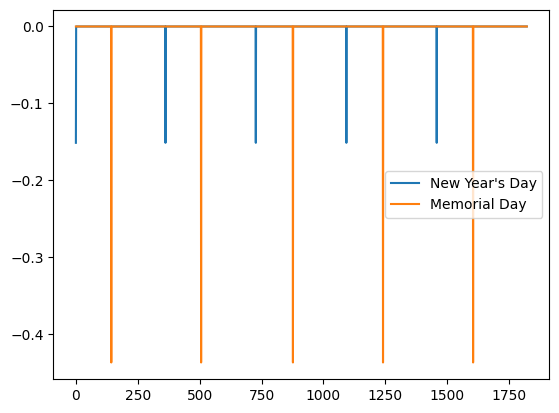

In [19]:
## plot some holiday effect

forecast[["New Year's Day","Memorial Day"]].plot()

In [15]:
## make df with holiday effect

def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.151432
1,Martin Luther King Jr. Day,-0.252407
2,Washington's Birthday,-0.108427
3,Memorial Day,-0.437341
4,Independence Day,-0.583548
5,Labor Day,-0.722447
6,Columbus Day,0.050808
7,Veterans Day,-0.076499
8,Thanksgiving,-0.695703
9,Christmas Day,-0.324647


## ***Adding default sate/province holidays***

In [28]:
from prophet.make_holidays import make_holidays_df

In [26]:
df['ds'].dt.year.unique().tolist()

[2014, 2015, 2016, 2017]

In [29]:
year_list = df['ds'].dt.year.unique().tolist()
# [2014, 2015, 2016, 2017]

# Identify the final year, as an integer, and increase it by 1
year_list.append(year_list[-1] + 1)
# [2014, 2015, 2016, 2017, 2018]

holidays = make_holidays_df(year_list=year_list,
                            country='US',
                            state='IL')

In [31]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-12,Lincoln's Birthday
3,2016-02-15,Washington's Birthday
4,2016-03-07,Casimir Pulaski Day
...,...,...
64,2015-09-07,Labor Day
65,2015-10-12,Columbus Day
66,2015-11-11,Veterans Day
67,2015-11-26,Thanksgiving


In [41]:
# Province holidays
[ day for day in holidays['holiday'].unique().tolist() if day not in model.train_holiday_names.to_list()]

["Lincoln's Birthday",
 'Casimir Pulaski Day',
 'Election Day',
 "Lincoln's Birthday (Observed)"]

In [42]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

14:05:15 - cmdstanpy - INFO - Chain [1] start processing
14:05:15 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
## 4 more holidays , 13 -> 17
model.train_holiday_names

0                    New Year's Day
1        Martin Luther King Jr. Day
2                Lincoln's Birthday
3             Washington's Birthday
4               Casimir Pulaski Day
5                      Memorial Day
6                  Independence Day
7                         Labor Day
8                      Columbus Day
9                      Election Day
10                     Veterans Day
11                     Thanksgiving
12                    Christmas Day
13         Christmas Day (Observed)
14        New Year's Day (Observed)
15    Lincoln's Birthday (Observed)
16          Veterans Day (Observed)
17      Independence Day (Observed)
dtype: object

## ***Creating custom holidays***

In [49]:
# one more year '2018'
year_list

[2014, 2015, 2016, 2017, 2018]

In [50]:
holidays = make_holidays_df(year_list=year_list, country='US')

In [51]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23'])})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24'])})

In [53]:
holidays[:5]

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day


In [54]:
# Before reset_index()
pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds')

,ds,holiday
34,2014-01-01,New Year's Day
35,2014-01-20,Martin Luther King Jr. Day
36,2014-02-17,Washington's Birthday
37,2014-05-26,Memorial Day
38,2014-07-04,Independence Day
...,...,...
31,2018-11-12,Veterans Day (Observed)
32,2018-11-22,Thanksgiving
4,2018-11-23,Black Friday
4,2018-12-24,Christmas Eve


In [56]:
holidays = pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds').reset_index(drop=True)

In [57]:
## after reset_index()
holidays

,ds,holiday
0,2014-01-01,New Year's Day
1,2014-01-20,Martin Luther King Jr. Day
2,2014-02-17,Washington's Birthday
3,2014-05-26,Memorial Day
4,2014-07-04,Independence Day
...,...,...
60,2018-11-12,Veterans Day (Observed)
61,2018-11-22,Thanksgiving
62,2018-11-23,Black Friday
63,2018-12-24,Christmas Eve


In [58]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

14:29:10 - cmdstanpy - INFO - Chain [1] start processing
14:29:10 - cmdstanpy - INFO - Chain [1] done processing


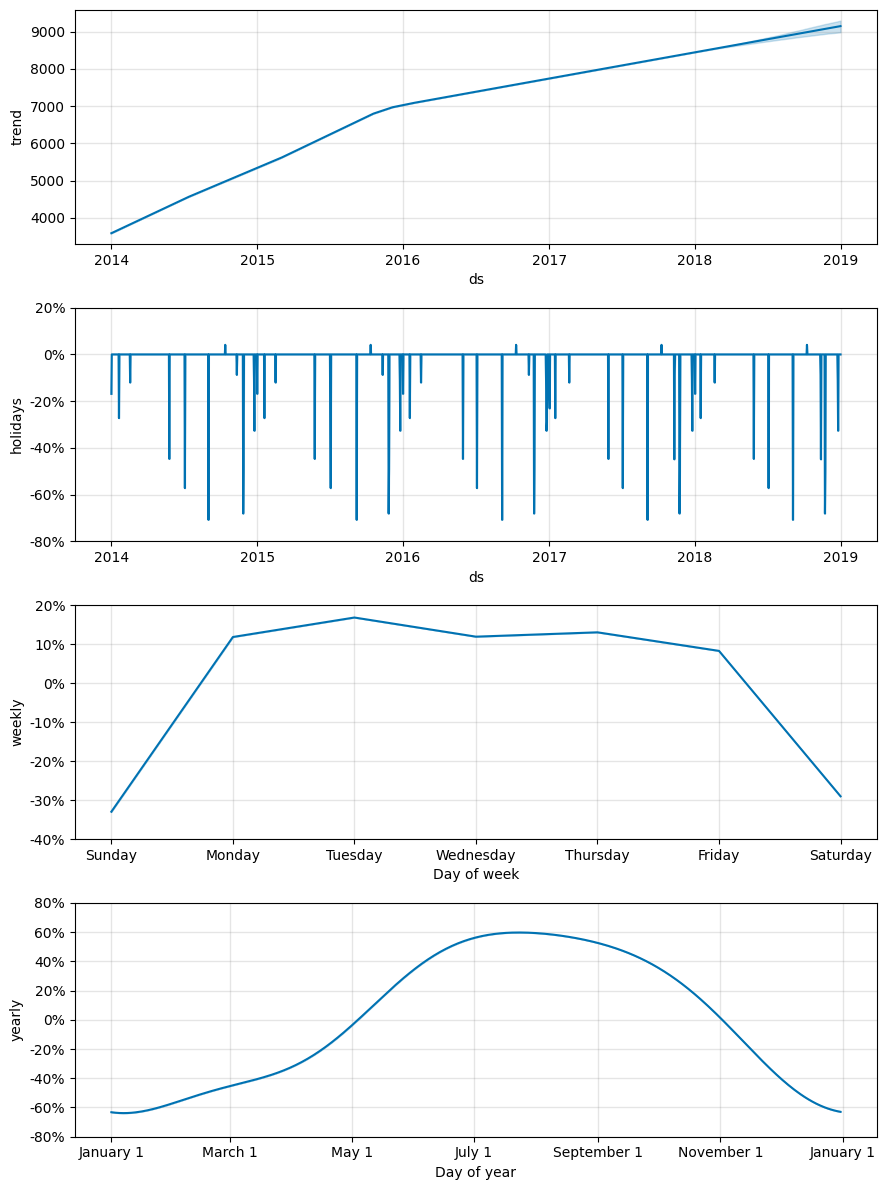

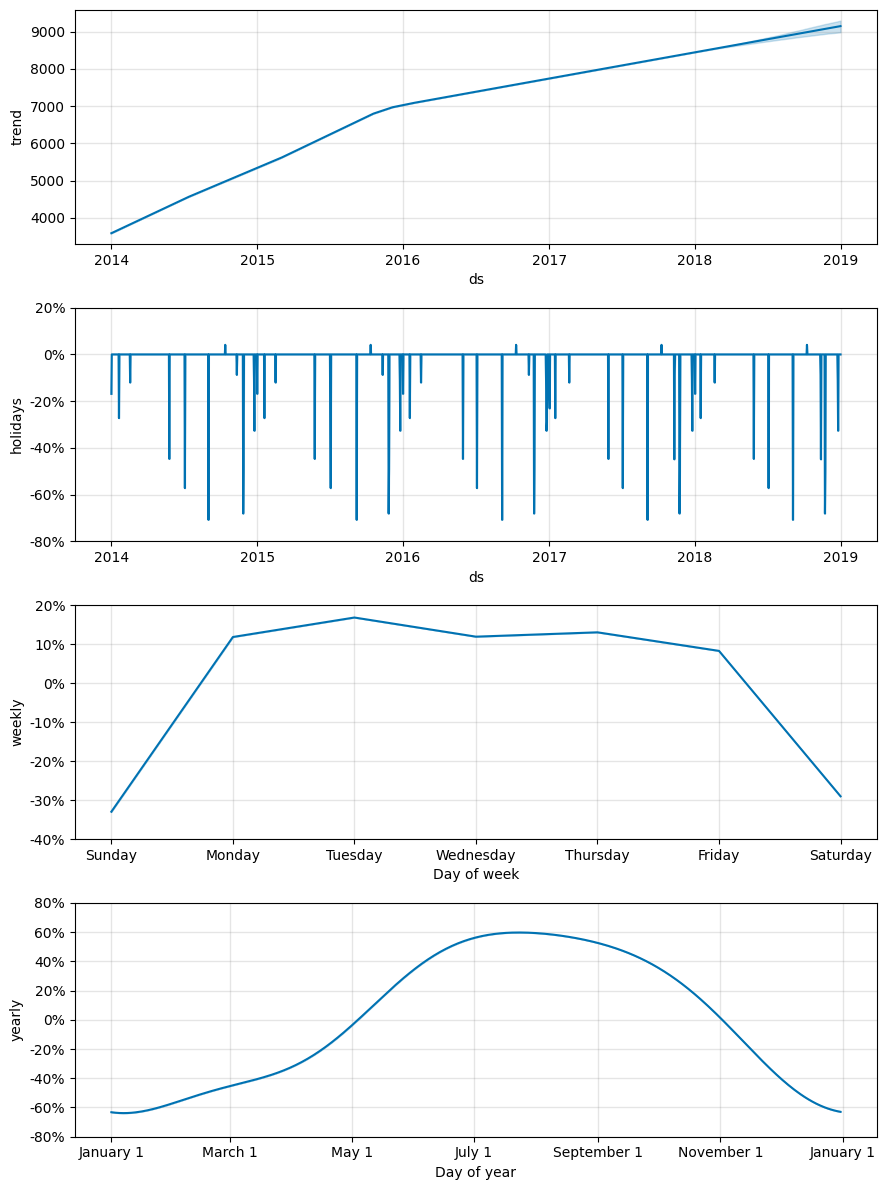

In [66]:
model.plot_components(forecast)

In [64]:
from prophet.plot import plot_components_plotly

plot_components_plotly(model,forecast)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

## ***Creating multi-day holidays***

In [69]:
# 'Taste of Chicago' 5 day-holidays
# main day, 'lower_window', 'upper_window'
holidays = make_holidays_df(year_list=year_list, country='US')

In [72]:
# No 'lower_window' , 'upper_window'
holidays[:10]

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day
5,2016-09-05,Labor Day
6,2016-10-10,Columbus Day
7,2016-11-11,Veterans Day
8,2016-11-24,Thanksgiving
9,2016-12-25,Christmas Day


In [73]:
taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4})
holidays = pd.concat([holidays, taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [74]:
## see 'lower_window' , 'upper_window' in 'Taste of Chicago' holiday
## NaN : Not A Number

holidays.head(10)

,ds,holiday,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN
5,2014-07-09,Taste of Chicago,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN


In [75]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

14:57:30 - cmdstanpy - INFO - Chain [1] start processing
14:57:31 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
## pandas isin , https://3months.tistory.com/283

forecast[forecast['ds'].isin(['2018-07-11',
                              '2018-07-12',
                              '2018-07-13',
                              '2018-07-14',
                              '2018-07-15']
                            )][['ds',
                                'Taste of Chicago']]

,ds,Taste of Chicago
1649,2018-07-11,-0.036137
1650,2018-07-12,0.020641
1651,2018-07-13,0.069125
1652,2018-07-14,0.014943
1653,2018-07-15,0.021594


In [80]:
from prophet.plot import plot_forecast_component
from prophet.plot import plot_forecast_component_plotly

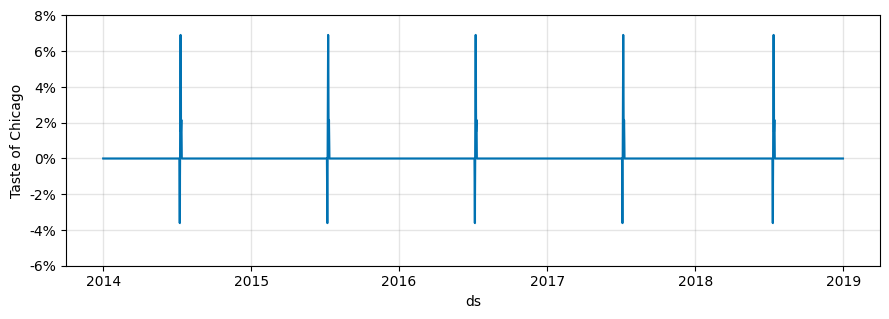

In [79]:
fig3 = plot_forecast_component(model,
                               forecast,
                               'Taste of Chicago',
                               figsize=(10.5, 3.25))
plt.show()

In [88]:
plot_forecast_component_plotly(model,
                              forecast,
                              'Taste of Chicago',
                              figsize=(1000, 500))

## ***Regularizing holidays***

### *Golbal regularization*

15:19:27 - cmdstanpy - INFO - Chain [1] start processing
15:19:27 - cmdstanpy - INFO - Chain [1] done processing


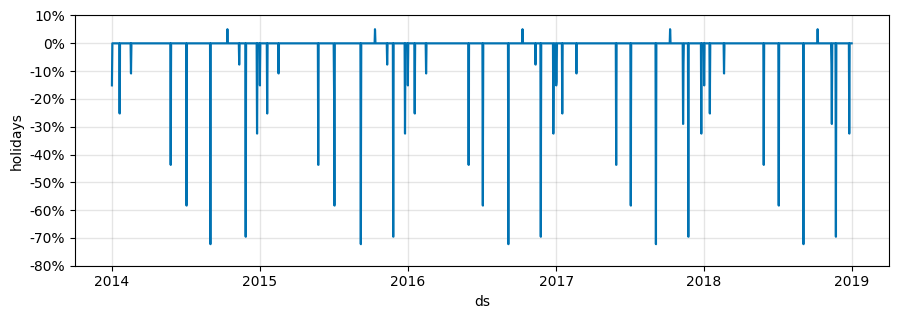

In [89]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=10)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

15:19:38 - cmdstanpy - INFO - Chain [1] start processing
15:19:38 - cmdstanpy - INFO - Chain [1] done processing


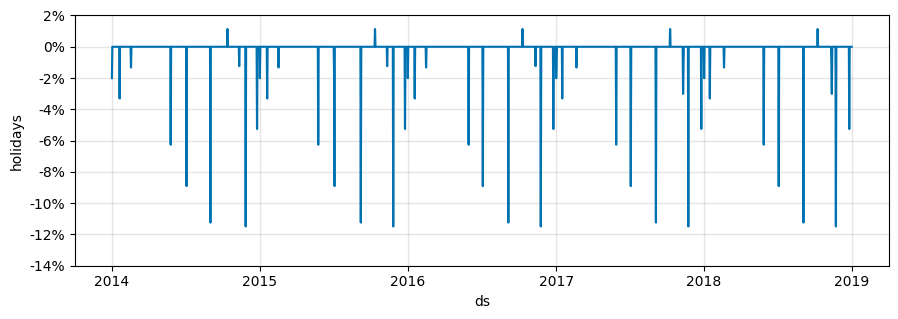

In [90]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=0.05)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

### *Individual holiday regularization*

In [91]:
holidays = make_holidays_df(year_list=year_list, country='US')

In [92]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23']),
                             'prior_scale': 1})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24']),
                              'prior_scale': 1})

taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4,
                                 'prior_scale': 0.1})

In [93]:
holidays = pd.concat([holidays,
                      black_friday,
                      christmas_eve,
                      taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [94]:
holidays.head(16)

,ds,holiday,prior_scale,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN,NaN
5,2014-07-09,Taste of Chicago,0.1,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN,NaN


In [95]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

15:20:47 - cmdstanpy - INFO - Chain [1] start processing
15:20:48 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
'holidays' in forecast.columns

True

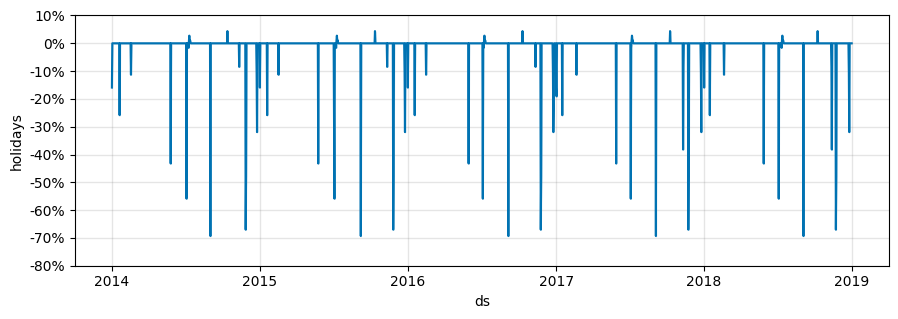

In [107]:
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

In [106]:
plot_forecast_component_plotly(model,
                              forecast,
                              'holidays',
                              figsize=(1000, 500))

AttributeError: 'DataFrame' object has no attribute 'iteritems'